In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import bokeh
import folium
import matplotlib as mpl
import mplleaflet
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (18,15)

In [91]:
eq = pd.read_csv('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')




In [92]:
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-02-25T17:14:54.850Z,33.982498,-116.981163,16.98,1.00,ml,19,58,0.074550,0.10,...,2016-02-25T17:17:40.592Z,"6km N of Beaumont, California",earthquake,0.36,0.98,0.226,6,automatic,ci,ci
1,2016-02-25T17:08:30.440Z,38.815498,-122.792831,3.00,0.55,md,8,106,0.007763,0.02,...,2016-02-25T17:10:05.050Z,"5km NW of The Geysers, California",earthquake,0.57,0.38,0.190,3,automatic,nc,nc
2,2016-02-25T16:47:17.600Z,34.178000,-117.402667,7.90,1.15,ml,38,53,0.086130,0.20,...,2016-02-25T16:52:07.860Z,"5km S of Devore, California",earthquake,0.31,0.89,0.125,28,automatic,ci,ci
3,2016-02-25T16:39:13.350Z,19.204834,-155.466171,0.04,2.55,ml,56,100,0.049310,0.28,...,2016-02-25T16:45:32.056Z,"1km E of Pahala, Hawaii",earthquake,0.31,0.15,0.620,9,automatic,hv,hv
4,2016-02-25T16:29:20.960Z,38.812168,-122.826164,2.02,0.43,md,9,74,0.004050,0.02,...,2016-02-25T16:49:05.082Z,"7km WNW of The Geysers, California",earthquake,0.43,0.61,0.130,2,automatic,nc,nc


In [93]:
eq.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                1658
gap                 802
dmin               2110
rms                   8
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError      17
depthError          142
magError           3025
magNst             2135
status                0
locationSource        0
magSource             0
dtype: int64

In [95]:
eq = eq.fillna(value=0)
eq.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [96]:
eq_lat = np.asarray(eq['latitude'])
eq_lon = np.asarray(eq['longitude'])
magnitudes = np.asarray(eq['mag'])

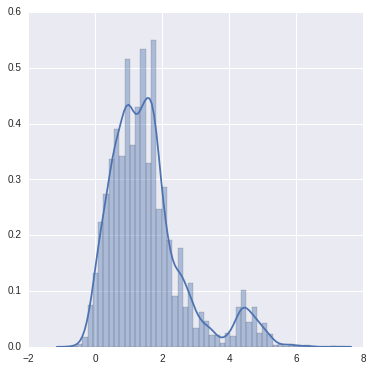

In [98]:
plt.figure(figsize=(6,6))
sns.distplot(magnitudes)

In [107]:
#airports = pd.DataFrame.from_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None)
airports = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', 
                      header=None)
airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone"]
airports = pd.DataFrame.convert_objects(airports)
airports.to_csv('airports.csv')

/home/arshad/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [71]:
airports.head()


,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10,U,Pacific/Port_Moresby


In [6]:
print(airports.shape[0])
print(airports.shape[1])

8107
12


In [72]:
air_lat= np.asarray(airports['latitude'])
air_lon = np.asarray(airports['longitude'])
air_id = np.asarray(airports['id'])

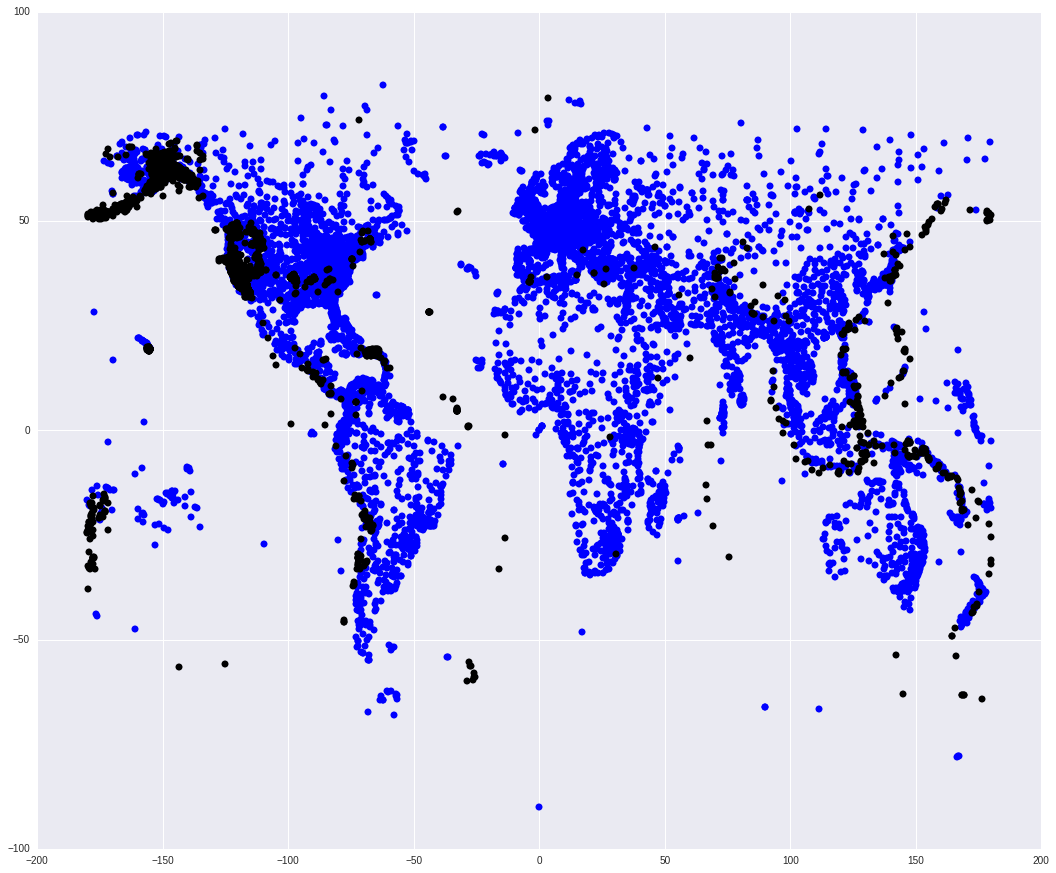

In [86]:
plt.plot(air_lon,air_lat,'bo')
plt.plot(eq_lon,eq_lat,'ko')

In [100]:
air_np = np.column_stack((air_id,air_lon, air_lat))

In [106]:
# Read in the routes data
routes = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat", header=None, dtype=str)
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]
routes = routes[routes["airline_id"] != "\\N"]
routes =  pd.DataFrame.convert_objects(routes)
routes.to_csv('routes.csv')

/home/arshad/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [102]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [105]:
np.where(routes["source_id"]==air_id,airports["longitude"],0)

ValueError: Lengths must match to compare

In [5]:
# Read in the airlines data.
airlines = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airlines.dat", header=None, dtype=str)
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]
# Read in the routes data.

In [33]:
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [10]:
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

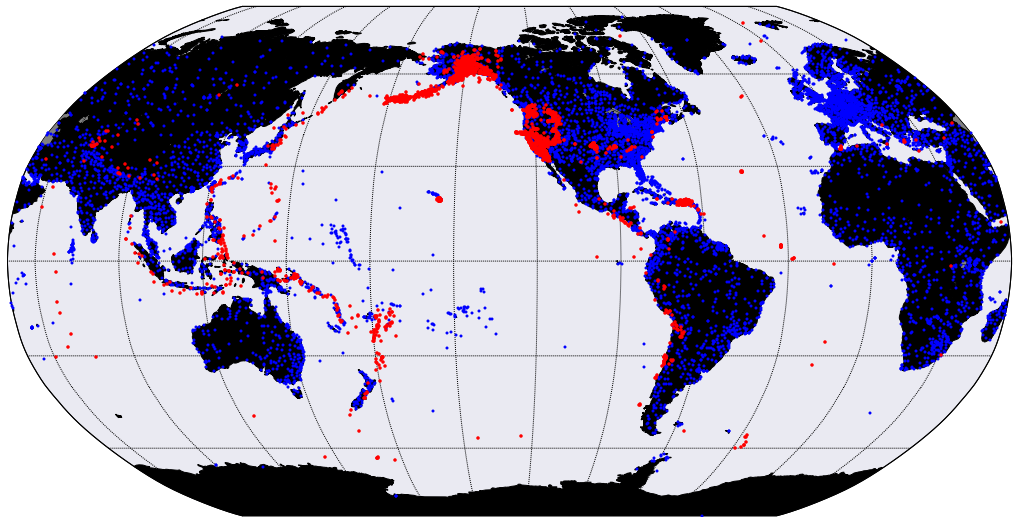

In [17]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'black', lake_color='gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

x1,y1 = eq_map(air_lon, air_lat)
eq_map.plot(x1, y1, 'bo', markersize=3)

x2,y2 = eq_map(eq_lon, eq_lat)
eq_map.plot(x2,y2, 'ro', markersize=3.5)

plt.show()

In [9]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

In [10]:
def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist

In [42]:
airport_id = np.asarray(airports["id"])
print(airport_id.shape[0])
airport_id[1:5]

8107


array([2, 3, 4, 5])

In [49]:
airport_id = np.asarray(airports["id"])


In [ ]:
https://opendata.socrata.com/resource/q2te-8cvq.json